---
title: Retrieval of leaf stomatal conductance with TSEB
subject: Tutorial
subtitle: Notebook that shows how we can retrieve an effective value of leaf stomata conductance and then be used to estimate carbon assimilation
short_title: Stomata conductance
authors:
  - name: Héctor Nieto
    affiliations:
      - Instituto de Ciencias Agrarias, ICA
      - CSIC
    orcid: 0000-0003-4250-6424
    email: hector.nieto@ica.csic.es
  - name: Benjamin Mary
    affiliations:
      - Insituto de Ciencias Agrarias
      - CSIC
    orcid: 0000-0001-7199-2885
license: CC-BY-SA-4.0
keywords: TSEB, stomata conductance, carbon and water fluxes
---

# Summary
This interactive Jupyter Notebook has the objective of showing how to derive leaf stomata conductance via TSEB outputs. It is based on [](https://doi.org/10.1007/s00271-022-00790-2) and ongoing work.

# Instructions
Read carefully all the text and follow the instructions.

Once each section is read, run the jupyter code cell underneath (marked as `In []`) by clicking the icon `Run`, or pressing the keys SHIFT+ENTER of your keyboard. A graphical interface will then display, which allows you to interact with and perform the assigned tasks.

To start, please run the following cell to import all the packages required for this notebook. Once you run the cell below, an acknowledgement message, stating all libraries were correctly imported, should be printed on screen.

In [2]:
%matplotlib inline
from pathlib import Path
from ipywidgets import interact, interactive, fixed, widgets
from IPython.display import display
import numpy as np

# TSEB and the Shuttleworth-Wallace model
If we revisit again the two-source Shuttleworth-Wallace energy combination model {cite:p}`https://doi.org/10.1002/qj.49711146910` we can see that TSEB indded is retrieving the "sensible heat flux side" of the graph:
    
:::{figure} ./input/figures/shuttleworth_wallace_model.png
:alt:Shuttleworth & Wallace energy combination model
:name:shuttleworth-wallace-model
Two-Source energy balance scheme including the transport of both heat (H) and water vapour ($\lambda E$). Adapted from [](https://doi.org/10.1002/qj.49711146910).
:::

From [](#shuttleworth-wallace-model), the canopy latent heat flux ($\lambda E_C$) can be express as:

:::{math}
:label:LE_C
\lambda E_C &= \frac{\rho_a c_p}{\gamma}\frac{e_{*}-e_0}{R_x + R_c}\\
:::

Therefore with the TSEB estimates of canopy latent heat fluxes and aerodynamic resistances, the effective conductance to water vapour diffusion exerted by all leaves in the canopy ($R_{c}$, s m$^{-1}$) can then be estimated by the resistance network of [](#shuttleworth-wallace-model): 

:::{math}
:label:TSEB_Rc
R_c &= \frac{\rho_a c_p\left(e_{*}-e_0\right)}{\lambda{}E_C\,\gamma}-R_x
:::

where $R_{c}$ represents the resistance to water diffusion through both the cuticle and stomata in the canopy (m s$^{-1}$), $e_*$ is the water vapour pressure in the leaf (kPa), which is assumed saturated at the leaf temperature $T_C$ (K) {cite:p}`http://dx.doi.org/10.1146/annurev.pp.33.060182.001533`, $R_{x}$ is the resistance to momentum and heat transport at the boundary layer of the canopy interface (m s$^{-1}$), and $e_{0}$ is the vapour pressure of the air at the canopy interface (kPa), which is related to the air water vapour pressure measured at the reference height $e_{a}$ through {}(#e_ac) (after [](#shuttleworth-wallace-model)):

:::{math}
:label:e_ac
     e_{0}  = e_{a}+\frac{\lambda E\,\gamma\,R_{a}}{\rho_a c_p}
:::

The conductance of the cuticle can be neglected with respect to the conductance of the stoma {cite:p}`https://doi.org/10.1111/nph.15395`. Therefore the stomatal conductance to H$_2$O of an effective leaf ($g_{st}$) can finally be computed by inverting [](#R_c)

:::{math}
:label: R_c
R_c = \frac{1}{g_{st} f_s f_g LAI}
:::

Eq. [](#TSEB_Rc) shows that stomatal conductance depends on canopy transpiration ($\lambda E_C$) and the canopy boundary layer resistances ($R_x$). Furthermore, $\lambda E_C$ depends at the same time on both soil $R_{s}$ and canopy $R_x$ resistances, since we assume an interaction of tubulent fluxes between canopy, soil and the atmosphere.

# Implementation with actual data in [pyTSEB](https://github.com/hectornieto/pyTSEB)

As with the previous exercices, we will work with any of the sites of GRAPEX, using the micrometeorological measurements and Earth Observation LAI.

:::{table}
:name: tab-site-description
Description of GRAPEX sites

Site | Latitude | Longitude | Elevation (m) | Row direction (deg.) | Row spacing (m) | Min. height (m) | Max. height (m) | Min. width (m) | Max. width (m) | TA height (m) | WS height (m)
:-- | --: | --: | --: | --: | --: | --: | --: | --: | --: | --: | --:
Ripperdan 720-1 | 36.849 | -120.176 | 61 | 90 | 3.35 | 1.2 | 2.2 | 0.5 | 2.25 | 4 | 4
Ripperdan 720-2 | 36.849 | -120.174 | 61 | 90 | 3.35 | 1.2 | 2.2 | 0.5 | 2.25 | 4 | 4
Ripperdan 720-3 | 36.848 | -120.176 | 61 | 90 | 3.35 | 1.2 | 2.2 | 0.5 | 2.25 | 4 | 4
Ripperdan 720-4 | 36.848 | -120.174 | 61 | 90 | 3.35 | 1.2 | 2.2 | 0.5 | 2.25 | 4 | 4
Barrelli_007 | 38.753 | -122.98 | 113 | 135 | 3.35 | 1.25 | 2.3 | 0.5 | 1.8 | 4 | 4
Barrelli_012 | 38.751369 | -122.974658 | 112 | 45 | 3.35 | 1.25 | 2.3 | 0.5 | 1.8 | 4.4 | 4.4
Sierra Loma-north | 38.289338 | -121.117764 | 38 | 90 | 3.35 | 1.42 | 2.25 | 0.5 | 2.6 | 5 | 5
Sierra Loma-south | 38.280488 | -121.117597 | 37 | 90 | 3.35 | 1-42 | 2.25 | 0.5 | 2 | 5 | 5
Ripperdan 760 | 36.839025 | -120.21014 | 58 | 90 | 2.74 | 1.2 | 2.5 | 0.5 | 1.8 | 5.5 | 5
Barrelli_016 | 38.747 | -122.963 | 112 | 135 | 3.35 | 1.25 | 2.3 | 0.5 | 1.8 | 4 | 4
:::

## Select a site

In [3]:
w_site = widgets.Dropdown(
    options=[('Sierra Loma N', "slmN"), ('Sierra Loma S', "slmS"), 
             ('Barrelli 007', "bar007"), ('Barrelli 012', "bar012"),
             ('Ripperdan 760', "rip760"), 
             ('Ripperdan 720-1', "rip720_1"),  ('Ripperdan 720-2', "rip720_2"),  
             ('Ripperdan 720-3', "rip720_3"),  ('Ripperdan 720-4', "rip720_4")],
    value="rip760",
    description='Site:',
)
display(w_site)

Dropdown(description='Site:', index=4, options=(('Sierra Loma N', 'slmN'), ('Sierra Loma S', 'slmS'), ('Barrel…

## Run TSEB-PT
To speed up the process and also show how to put the low-level code of pyTSEB in a single script, in this final exercise we are putting all the code together:

In [4]:
################################################################################
# Empirical equations to generate canopy structural parameters from LAI
################################################################################
import numpy as np


def lai_2_hc(lai, hc_min):
    slope = 0.42
    hc = hc_min + slope * lai
    return hc


def lai_2_hbratio(lai, hc_min):
    hb_ratio_mean = 0.4848388065
    hb_ratio = np.zeros(lai.shape)

    hb_ratio[lai < hc_min] = 1. + ((hb_ratio_mean - 1.) / hc_min) * lai[
        lai < hc_min]
    hb_ratio[lai >= hc_min] = hb_ratio_mean

    return hb_ratio


def lai_2_width(lai, wc_min, wc_max):
    beta = 6.96560056
    offset = 1.70825736

    width = wc_min + (wc_max - wc_min) / (1.0 + np.exp(-beta * (lai - offset)))

    return width


def lai_2_fcover(lai, fc_min, fc_max):
    beta = 7.0
    offset = 1.70

    fcover = fc_min + (fc_max - fc_min) / (1.0 + np.exp(-beta * (lai - offset)))

    return fcover


def lai_2_canopy(lai, hc_min, fc_min, fc_max):
    hc = lai_2_hc(lai, hc_min)
    hb_ratio = lai_2_hbratio(lai, hc_min)
    fcover = lai_2_fcover(lai, fc_min, fc_max)

    return hc, hb_ratio, fcover

In [5]:
# Import Python libraries
from pathlib import Path
import pandas as pd
import numpy as np
import yaml
from pyTSEB import TSEB

# We can get the leaf and soil spectral from the values above, or hard code the corresponding values
rho_leaf_vis = 0.054
rho_leaf_nir = 0.262
tau_leaf_vis = 0.038
tau_leaf_nir = 0.333
rho_soil_vis = 0.07
rho_soil_nir = 0.32

# Grapevine leaf width
leaf_width = 0.10

# Roughness for bare soil
z0_soil = 0.15

# Kustas and Norman boundary layer resistance parameters
roil_resistance_c_param = 0.0038
roil_resistance_b_param = 0.012
roil_resistance_cprime_param = 90.

# Thermal spectra
e_v = 0.99  # Leaf emissivity
e_s = 0.94  # Soil emissivity

# Priestley-Taylor coefficient for potential transpiration
alpha_PT_0 = 1.26

# Read the LAI and Micrometeorology data
# ======================================
# Set the LAI and readiation folders
input_dir = Path().absolute() / "input"
lai_dir = input_dir / "canopy"
ec_dir = input_dir / "meteo"
# Set the input files based on the chosen site
lai_filename = lai_dir / f"FLX_US-{w_site.value}_FLUXNET2015_AUXCANOPY_DD.csv"
ec_filename = ec_dir / f"FLX_US-{w_site.value}_FLUXNET2015_SUBSET_HR.csv"
print(f"LAI file path is {lai_filename}")
print(f"EC file path is {ec_filename}")

# Read the LAI and radiation tables
lai = pd.read_csv(lai_filename, sep=";", na_values=-9999)
ec = pd.read_csv(ec_filename, sep=";", na_values=-9999)

# Merge both tables by date
ec["TIMESTAMP"] = pd.to_datetime(ec["TIMESTAMP"], format="%Y%m%d%H%M")
lai["DATE"] = pd.to_datetime(lai["TIMESTAMP"], format="%Y%m%d").dt.date
lai = lai.drop(labels=["TIMESTAMP"], axis=1)
ec["DATE"] = ec["TIMESTAMP"].dt.date
ec = ec.merge(lai, on="DATE")

# We discard all cases at night (SW_IN <=0)
ec = ec[ec["SW_IN"] > 0]

# Convert Celsius to Kelvin
ec["TA"] = ec["TA"] + 273.15
# Convert kPa to hPa
ec["PA"] = 10 * ec["PA"]

# Evaluate different energy balance closure corrections
ec["H_RES"] = ec["NETRAD"] - ec["G"] - ec["LE"]
ec['LE_RES'] = ec['NETRAD'] - ec['G'] - ec['H']
ec["LE_BR"], ec["H_BR"] = TSEB.met.bowen_ratio_closure(ec["NETRAD"], ec["G"],
                                                       ec["H"], ec["LE"])
# Mean of uncorrected, ressidual and Bowen Ratio
ec["H_ENS"] = np.nanmean([ec["H_RES"], ec["H_BR"], ec['H']], axis=0)
ec["LE_ENS"] = np.nanmean([ec["LE_RES"], ec["LE_BR"], ec['LE']], axis=0)


# Get the canopy a priori structural properties
# =============================================
yaml_file = input_dir / "site_description.yaml"
site_dict = yaml.safe_load(yaml_file.read_text())
lat = float(site_dict["lat"][w_site.value])
lon = float(site_dict["lon"][w_site.value])
elev = float(site_dict["elev"][w_site.value])
row_direction = float(site_dict["row_direction"][w_site.value])
interrow = float(site_dict["interrow"][w_site.value])
hc_min = float(site_dict["hc_min"][w_site.value])
hc_max = float(site_dict["hc_max"][w_site.value])
wc_min = float(site_dict["wc_min"][w_site.value])
wc_max = float(site_dict["wc_max"][w_site.value])
zh = float(site_dict["zh"][w_site.value])
zm = float(site_dict["zm"][w_site.value])

print(f"{w_site.label} has the following site characteristics:\n"
      f"\t Latitude: {lat} deg. \n"
      f"\t Longitude: {lon} deg. \n"
      f"\t Elevation: {elev} m \n"
      f"\t Row direction: {row_direction} deg. \n"
      f"\t Row spacing: {interrow} m \n"
      f"\t Min. canopy height: {hc_min} m \n"
      f"\t Max. canopy height: {hc_max} m \n"
      f"\t Min. canopy width: {wc_min} m \n"
      f"\t Max. canopy width: {wc_max} m \n"
      f"\t Air temperature measurement height: {zh} m \n"
      f"\t Wind speed temperature measurement height: {zh} m"
)

# Estimate the structural variables based on Earth Observation LAI timeseries
# ===========================================================================
fc_min = wc_min / interrow
fc_max = wc_max / interrow
h_c, hb_ratio, f_c = lai_2_canopy(ec["LAI"].values,
                                  hc_min,
                                  fc_min,
                                  fc_max)

# Ensure that both canopy height and cover are within the limits
h_c = np.clip(h_c, hc_min, hc_max)
f_c = np.clip(f_c, 0, 1)

# canopy width
w_c = f_c * interrow
# Canopy width to height ratio
w_c_ratio = w_c / (h_c - hb_ratio * h_c)
# Local LAI
F = ec["LAI"].values / f_c

# The time zone is PST, which corresponds to -120 deg, time longitude
stdlon = -120
# Call calc_sun_angles based on site coordinates and timestamp
sza, saa = TSEB.met.calc_sun_angles(
    np.full_like(ec['LAI'].values, lat),
    np.full_like(ec["LAI"].values, lon),
    np.full_like(ec["LAI"].values, stdlon),
    ec['TIMESTAMP'].dt.dayofyear.values,
    ec['TIMESTAMP'].dt.hour.values + ec['TIMESTAMP'].dt.minute.values / 60.)

# Compute the relative sun-row azimuth angle
psi = row_direction - saa
# Compute the clumping index for row crops
omega = TSEB.CI.calc_omega_rows(ec["LAI"], f_c, theta=sza,
                                psi=psi, w_c=w_c_ratio)

# And the effective LAI is the product of local LAI and the clumping index
lai_eff = F * omega

# Estimates the direct and diffuse solar radiation
difvis, difnir, fvis, fnir = TSEB.rad.calc_difuse_ratio(ec["SW_IN"].values,
                                                        sza,
                                                        press=np.full_like(sza, 1013.15))
par_dir = fvis * (1. - difvis) * ec["SW_IN"].values
nir_dir = fnir * (1. - difnir) * ec["SW_IN"].values
par_dif = fvis * difvis * ec["SW_IN"].values
nir_dif = fnir * difnir * ec["SW_IN"].values

# Compute the canopy and soil net radiation using Cambpell RTM
sn_c, sn_s = TSEB.rad.calc_Sn_Campbell(ec["LAI"].values,
                                       sza,
                                       par_dir + nir_dir,
                                       par_dif + nir_dif,
                                       fvis,
                                       fnir,
                                       np.full_like(sza, rho_leaf_vis),
                                       np.full_like(sza, tau_leaf_vis),
                                       np.full_like(sza, rho_leaf_nir),
                                       np.full_like(sza, tau_leaf_nir),
                                       np.full_like(sza, rho_soil_vis),
                                       np.full_like(sza, rho_soil_nir),
                                       x_LAD=1,
                                       LAI_eff=lai_eff)

sn_c[~np.isfinite(sn_c)] = 0
sn_s[~np.isfinite(sn_s)] = 0

# Estimate surface aerodynamic roughness
# ======================================
z_0m, d_0 = TSEB.res.calc_roughness(ec["LAI"], h_c, w_c_ratio, np.full_like(ec["LAI"], TSEB.res.BROADLEAVED_D), f_c=f_c)
# Ensure realistic values
d_0[d_0 < 0] = 0
z_0m[np.isnan(z_0m)] = z0_soil
z_0m[z_0m < z0_soil] = z0_soil

# We derive the LST from the insitu pyrgeometers
# Surface emissivity
e_surf = f_c * e_v + (1. - f_c) * e_s

# LST from longwave radiometers
lst = ((ec['LW_OUT'].values - (1. - e_surf) * ec['LW_IN'].values) / (
        TSEB.rad.SB * e_surf)) ** 0.25

# And it is assuming that the radiometer is looking at nadir
vza = np.zeros_like(lst)

# Run TSEB-PT
# ===========
resistance_flag = [0, {"KN_c": np.full_like(lst, roil_resistance_c_param),
                       "KN_b": np.full_like(lst, roil_resistance_b_param),
                       "KN_C_dash": np.full_like(lst, roil_resistance_cprime_param)}]

[flag_pt, ts_pt, tc_pt, t_ac_pt, ln_s_pt, ln_c_pt, le_c_pt, h_c_pt, le_s_pt, h_s_pt, g_pt,
 r_s_pt, r_x_pt, r_a_pt, u_friction_pt, lmo_pt, n_iterations_pt] = TSEB.TSEB_PT(                                                     
     lst,
     vza,
     ec["TA"].values,
     ec["WS"].values,
     ec["EA"].values,
     ec["PA"].values,
     sn_c,
     sn_s,
     ec["LW_IN"].values,
     ec["LAI"].values,
     h_c,
     e_v,
     e_s,
     z_0m,
     d_0,
     zm,
     zh,
     x_LAD=np.ones_like(lst),
     f_c=f_c,
     f_g=np.ones_like(lst),
     w_C=w_c_ratio,
     leaf_width=leaf_width,
     z0_soil=z0_soil,
     alpha_PT=alpha_PT_0,
     resistance_form=resistance_flag,
     calcG_params=[[1], 0.35])

# ... and we compute the bulk fluxes
le_pt = le_c_pt + le_s_pt
h_pt = h_c_pt + h_s_pt
netrad_pt = sn_c + sn_s + ln_c_pt + ln_s_pt

print("Finished running TSEB-PT")

LAI file path is C:\Users\06325897T\Nextcloud\1_Projects\ILINK24\Workshop_3SEB_UCDavis\py3SEB-workshop\input\canopy\FLX_US-rip760_FLUXNET2015_AUXCANOPY_DD.csv
EC file path is C:\Users\06325897T\Nextcloud\1_Projects\ILINK24\Workshop_3SEB_UCDavis\py3SEB-workshop\input\meteo\FLX_US-rip760_FLUXNET2015_SUBSET_HR.csv


C:\Users\06325897T\AppData\Local\Temp\ipykernel_10404\792283912.py:71: RuntimeWarning: Mean of empty slice
  ec["H_ENS"] = np.nanmean([ec["H_RES"], ec["H_BR"], ec['H']], axis=0)
C:\Users\06325897T\AppData\Local\Temp\ipykernel_10404\792283912.py:72: RuntimeWarning: Mean of empty slice
  ec["LE_ENS"] = np.nanmean([ec["LE_RES"], ec["LE_BR"], ec['LE']], axis=0)
C:\Users\06325897T\AppData\Local\miniconda3\envs\py3seb-workshop\Lib\site-packages\pyTSEB\TSEB.py:1975: RuntimeWarning: invalid value encountered in divide
  L_diff = np.asarray(np.fabs(L - L_old) / np.fabs(L_old), dtype=np.float32)


Ripperdan 760 has the following site characteristics:
	 Latitude: 36.839025 deg. 
	 Longitude: -120.21014 deg. 
	 Elevation: 58.0 m 
	 Row direction: 90.0 deg. 
	 Row spacing: 2.74 m 
	 Min. canopy height: 1.2 m 
	 Max. canopy height: 2.5 m 
	 Min. canopy width: 0.5 m 
	 Max. canopy width: 1.8 m 
	 Air temperature measurement height: 5.5 m 
	 Wind speed temperature measurement height: 5.5 m
Iteration: 0, non-converged pixels: 14924, max L diff: inf, total time: 0.000048, loop time: 0.000047
Iteration: 1, non-converged pixels: 11399, max L diff: inf, total time: 0.121762, loop time: 0.121714
Iteration: 2, non-converged pixels: 11399, max L diff: 881.933105, total time: 0.246592, loop time: 0.124830
Iteration: 3, non-converged pixels: 11399, max L diff: 1095.526611, total time: 0.353769, loop time: 0.107177
Iteration: 4, non-converged pixels: 10027, max L diff: 726.076843, total time: 0.454858, loop time: 0.101089
Iteration: 5, non-converged pixels: 9099, max L diff: 929.820679, total ti

## Invert the SW resistance network to obtain $g_{st}$
With the TSEB estimates of $\lambda E$ (`le_pt`), $\lambda E_C$ (`le_c_pt`), $T_c$ (`tc_pt`), $R_a$ (`r_a_pt`), $R_x$ (`r_x_pt`), together with LAI and meteo forcing we derived the effective leaf stomata conductance to water vapour ($g_{st}$)

In [6]:
# Set leaf stomata distribution (1: hypostomatous, 2: amphistomatous)
leaf_type = TSEB.res.HYPOSTOMATOUS
# Set expected maximum conductance
max_gst = 0.53  # Can be derived from the Monteith 1995 retrievals seen in TSEB-SW notebook

def calc_stomatal_resistance_TSEB(
        LE_C,
        LE,
        R_A,
        R_x,
        e_a,
        T_A,
        T_C,
        F,
        p=1013.0,
        leaf_type=1,
        f_g=1,
        f_dry=1):
    ''' TSEB Stomatal conductace

    Estimates the effective Stomatal conductace by inverting the
    resistance-based canopy latent heat flux from a Two source perspective

    Parameters
    ----------
    LE_C : float
        Canopy latent heat flux (W m-2).
    LE : float
        Surface (bulk) latent heat flux (W m-2).
    R_A : float
        Aerodynamic resistance to heat transport (s m-1).
    R_x : float
        Bulk aerodynamic resistance to heat transport at the canopy boundary layer (s m-1).
    e_a : float
        Water vapour pressure at the reference height (mb).
    T_A : float
        Air temperature at the reference height (K).
    T_C : float
        Canopy (leaf) temperature (K).
    F : float
        local Leaf Area Index.
    p : float, optional
        Atmospheric pressure (mb) use 1013.0 as default.
    leaf_type : int, optional
        type of leaf regarding stomata distribution.

            1=HYPOSTOMATOUS stomata in the lower surface of the leaf (default).
            2=AMPHISTOMATOUS, stomata in both surfaces of the leaf.
    f_g : float, optional
        Fraction of green leaves.
    f_dry : float, optional
        Fraction of dry (non-wet) leaves.

    Returns
    -------
    G_s : float
        effective leaf stomata conductance (m s-1).

    References
    ----------
    .. [Anderson2000] M.C. Anderson, J.M. Norman, T.P. Meyers, G.R. Diak, An analytical
        model for estimating canopy transpiration and carbon assimilation fluxes based on
        canopy light-use efficiency, Agricultural and Forest Meteorology, Volume 101,
        Issue 4, 12 April 2000, Pages 265-289, ISSN 0168-1923,
        http://dx.doi.org/10.1016/S0168-1923(99)00170-7.'''

    # Convert input scalars to numpy arrays
    LE_C, LE, R_A, R_x, e_a, T_A, T_C, F, p, leaf_type, f_g, f_dry = map(
        np.asarray, (LE_C, LE, R_A, R_x, e_a, T_A, T_C, F, p, leaf_type, f_g, f_dry))

    # Invert the bulk SW to obtain eb (vapor pressure at the canopy interface)
    rho = TSEB.met.calc_rho(p, e_a, T_A)
    Cp = TSEB.met.calc_c_p(p, e_a)
    Lambda = TSEB.met.calc_lambda(T_A)
    psicr = TSEB.met.calc_psicr(Cp, p, Lambda)
    e_ac = e_a + LE * R_A * psicr / (rho * Cp)
    # Calculate the saturation vapour pressure in the leaf in mb
    e_star = TSEB.met.calc_vapor_pressure(T_C)
    # Ensure physical constrains in canopy-air vpd
    e_ac = np.clip(e_ac, 0, e_star)
    # Calculate the boundary layer canopy resisitance to water vapour (Anderson et al. 2000)
    # Invert the SW LE_S equation to calculate the bulk stomatal resistance
    R_c = np.asarray((rho * Cp * (e_star - e_ac) / (LE_C * psicr)) - R_x)
    K_c = np.asarray(f_dry * f_g * leaf_type)
    # Get the mean stomatal resistance (here LAI comes in as stomatal resistances
    # are in parallel: 1/Rc=sum(1/R_st)=LAI/Rst
    r_st = R_c * K_c * F
    # Ensure positive stomatal resistance
    r_st = np.maximum(r_st, 0)
    return np.asarray(r_st)
    
    
r_st = calc_stomatal_resistance_TSEB(le_c_pt, le_pt, r_a_pt, r_x_pt, ec["EA"].values, ec["TA"].values,
                                     tc_pt, ec["LAI"].values, p=ec["PA"].values, leaf_type=leaf_type)

# and the mean leaf conductance is the reciprocal of R_st (m s-1)
g_st = np.full(r_st.shape, np.nan)
valid = np.logical_and(np.isfinite(r_st), r_st > 0)
g_st[valid] = 1.0 / r_st[valid]
# Convert from m s-1 to mol m-2 s-1
g_st[valid] = g_st[valid] / TSEB.res.molm2s1_2_ms1(ec.loc[valid, "TA"], p=ec.loc[valid, "PA"])
g_st[valid] = np.clip(g_st[valid], 0, max_gst)

C:\Users\06325897T\AppData\Local\Temp\ipykernel_10404\1118094808.py:83: RuntimeWarning: divide by zero encountered in divide
  R_c = np.asarray((rho * Cp * (e_star - e_ac) / (LE_C * psicr)) - R_x)
C:\Users\06325897T\AppData\Local\Temp\ipykernel_10404\1118094808.py:83: RuntimeWarning: invalid value encountered in divide
  R_c = np.asarray((rho * Cp * (e_star - e_ac) / (LE_C * psicr)) - R_x)


:::{seealso}
:class:dropdown
 Check in the pyTSEB GitHub repository: [calc_stomatal_resistance_TSEB](https://github.com/hectornieto/pyTSEB/blob/382e4fc01e965143ebafdaefe5be9b45c737455a/pyTSEB/resistances.py#L790) and [calc_stomatal_conductance_TSEB](https://github.com/hectornieto/pyTSEB/blob/382e4fc01e965143ebafdaefe5be9b45c737455a/pyTSEB/resistances.py#L877) for more details)

### We plot time series of stomata conductance
The next cell will let you plot the full timeseries of $g_{st}$ and LAI. You can zoom in to see more in details the daily trends of stomata conductance with a trend of skewness before noon, probably due to stomata closure in the afternoon caused by larger VPD?.

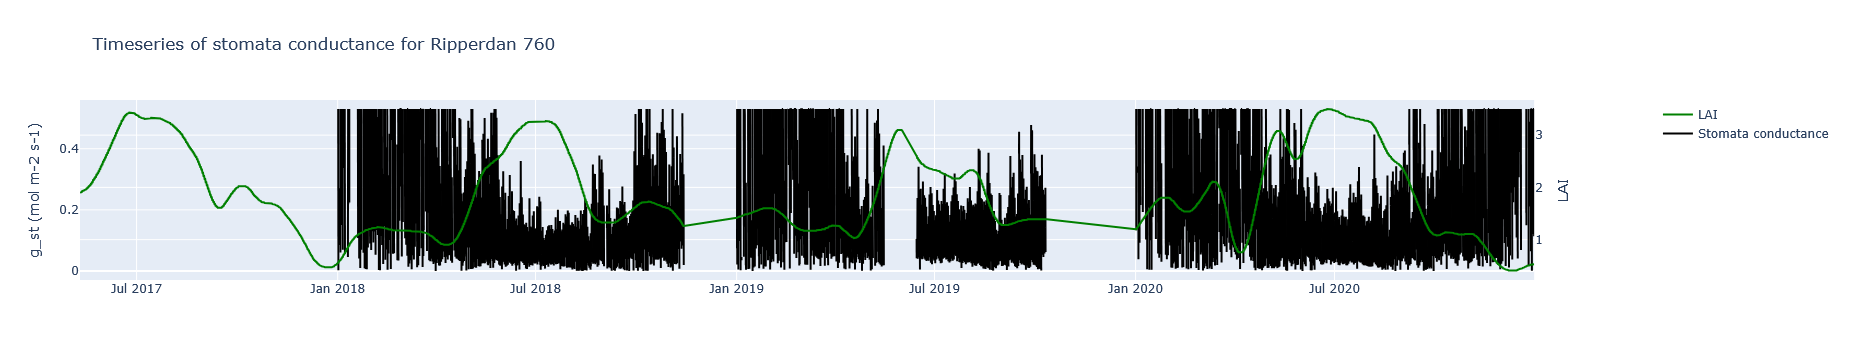

In [7]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=ec["TIMESTAMP"], y=ec["LAI"], 
                         name="LAI", 
                         mode="lines", line={"color":"green"}),
              secondary_y=True)

fig.add_trace(go.Scatter(x=ec["TIMESTAMP"], y=g_st, 
                         name="Stomata conductance",
                         mode="lines",line={"color":"black"})
             )

fig.update_layout(title_text=f"Timeseries of stomata conductance for {w_site.label}",
                 hovermode="x")
fig.update_yaxes(title_text="LAI", secondary_y=True)
fig.update_yaxes(title_text="g_st (mol m-2 s-1)", secondary_y=False)

# Implementing the TSEB stomatal conductance into a photosyntheis model
Our TSEB-derived g_{gs} could be implemented in the t wo-source model of heat, water and carbon exchange between the canopy and the atmosphere by [](https://doi.org/10.1046/j.1365-3040.2003.01035.x), which at the same time relies on the biochemical model of photosynthesis of [](https://doi.org/10.1007/bf00386231):

:::{math}
A_c & = V_{c,max}\frac{C_i - \Gamma_*}{C_i + K_c\left(1 + O_i/K_o\right)}\\
A_q & = \frac{J}{4}\frac{C_i - \Gamma_*}{C_i + 2\Gamma_*}\\
:::

$A_c$ is the assimilation rate, limited by Rubisco activity, $A_q$ the assimilation rate when photosynthetic electron transport limits RuP$_2$ regeneration, $J$ is the electron transport rate for a given absorbed photon irradiance, $Q$
 
:::{math}
\theta J^2 - \left(\alpha Q + J_{max}\right)J + \alpha Q J_{max} = 0
:::

where $\theta=0.9$ determines the shape of the non-rectangular hyperbola, $J_{max}$ is the potential rate of whole-chain electron transport and $\alpha=0.2$ is the quantum yield of whole-chain electron transport.

The approach requires the parametrization of the enzimatic activity ($V_{c,max}$, $J_{max}$, ...), which in this case we use standard values derived for bibliography for simplicity.      



In [8]:
from pyTSEB import physiology as lf
# Convert leaf stomata conductance to H2O to CO2
GV_GC_RATIO = 1.6
g_st_co2 = g_st / GV_GC_RATIO
gs = g_st_co2 * ec["LAI"] * leaf_type

# Get a rough estimate of soil respiration based on soil temperature
f_soil_10_0 = 1.5
e_0 = 308.56 
t_ref = 283.15
r_soil = f_soil_10_0 * np.exp(e_0 * (1. / (t_ref - 227.13) - 1. / (ts_pt - 227.13)))
# Assume a constant atmospheric C02 concentration (one could also use the measured CO2 concentration at the EC system)
ca = np.full_like(gs, 412)
assim, rd, ci, temp_lim = lf.gpp_canopy(gs,
                                        r_x_pt,
                                        r_a_pt,
                                        tc_pt,
                                        ec["TA"].values,
                                        ec["LAI"].values,
                                        par_dir / lf.MUEINSTEIN_2_WATT,  # from Wm-2 to micromol of photons/s
                                        par_dif / lf.MUEINSTEIN_2_WATT,  # from Wm-2 to micromol of photons/s
                                        sza,
                                        lai_eff=lai_eff,
                                        rho_leaf=np.full_like(gs, rho_leaf_vis),
                                        tau_leaf=np.full_like(gs, tau_leaf_vis),
                                        rho_soil=np.full_like(gs, rho_soil_vis),
                                        press=ec["PA"].values,
                                        f_soil=r_soil,
                                        ca=ca)

# GPP is the net assimilation rate plus the leaf respiration
gpp = assim + rd
print("Calculation of CO2 assimilation completed!")

Calculation of CO2 assimilation completed!


:::{seealso}
:class:dropdown
You can also check the [pyTSEB GitHub source code](https://github.com/hectornieto/pyTSEB/blob/382e4fc01e965143ebafdaefe5be9b45c737455a/pyTSEB/physiology.py#L636)
:::

## Evaluate the output with the EC data
We have processed some EC data using the [ONEFlux](https://github.com/fluxnet/ONEFlux) code in order to obtain in situ estimates of GPP and NEE that we could use to validate. These files are located at the [](./input/meteo) folder, with a `GPPFLX` prefix. 

Since the [ONEFlux](https://github.com/fluxnet/ONEFlux) software used several methods for partitioning GPP {cite:p}`https://doi.org/10.1038/s41597-020-0534-3`, choose first the metric you want to use:

In [9]:
w_gpp = widgets.Dropdown(
    options=[('GPP_NT_VUT_REF'), 
             ('GPP_NT_VUT_50'), 
             ('GPP_DT_VUT_REF'), 
             ('GPP_DT_VUT_50')],
    value=("GPP_NT_VUT_REF"),
    description='GPP FLUXNET2015 metric:',
)
display(w_gpp)

Dropdown(description='GPP FLUXNET2015 metric:', options=('GPP_NT_VUT_REF', 'GPP_NT_VUT_50', 'GPP_DT_VUT_REF', …

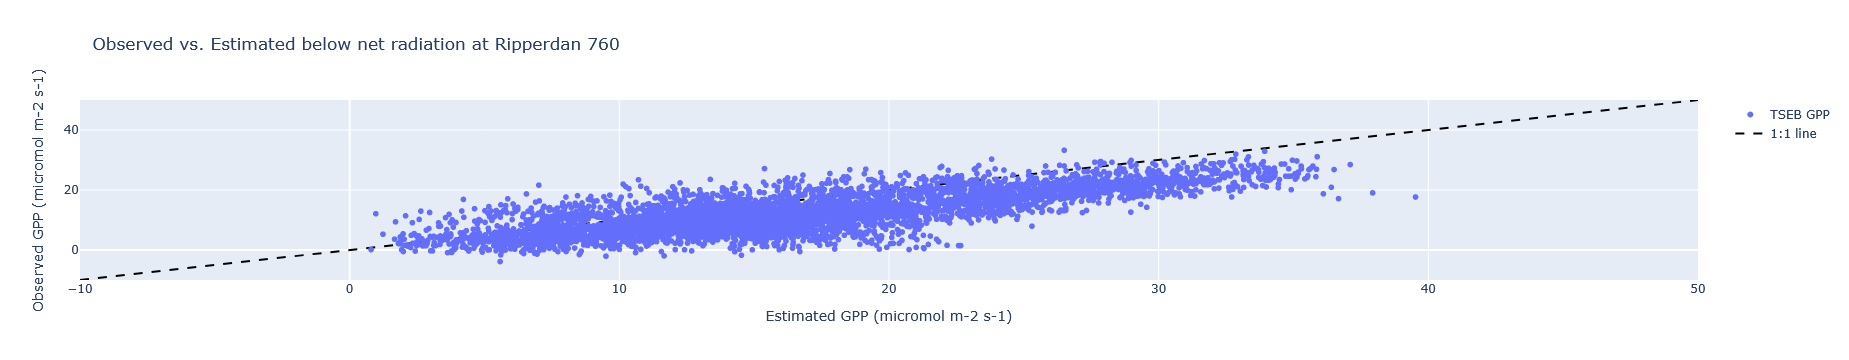

In [10]:
from model_evaluation import double_collocation as dc

gpp_filename = ec_dir / f"GPPFLX_US-{w_site.value}_FLUXNET2015_SUBSET_HR.csv"

# Read the ONEFLux table
gpp_insitu = pd.read_csv(gpp_filename, sep=",", na_values=-9999)
gpp_insitu["TIMESTAMP_START"] = pd.to_datetime(gpp_insitu["TIMESTAMP_START"], format="%Y%m%d%H%M")
gpp_insitu["TIMESTAMP_END"] = pd.to_datetime(gpp_insitu["TIMESTAMP_END"], format="%Y%m%d%H%M")
gpp_insitu["TIMESTAMP"] = gpp_insitu[['TIMESTAMP_START', 'TIMESTAMP_END']].mean(axis=1)
gpp_insitu = gpp_insitu[["TIMESTAMP", w_gpp.value]] 

# Before merging add the estimated GPP to the pandas dataframe
ec["GPP_TSEB"] = gpp
# Merge both dataframes by date
ec_new = ec.merge(gpp_insitu, on="TIMESTAMP")

daytime = ec_new["SW_IN"] > 100

fig = go.Figure()
fig.add_trace(go.Scattergl(x=ec_new.loc[daytime, "GPP_TSEB"], y=ec_new.loc[daytime, w_gpp.value], mode="markers", name="TSEB GPP"))
fig.add_trace(go.Scatter(x=[-10, 50], y=[-10, 50], mode="lines", name="1:1 line", line={"color": "black", "dash": "dash"}))
fig.update_layout(title_text=f"Observed vs. Estimated below net radiation at {w_site.label}",
                  yaxis_range=[-10, 50], xaxis_range=[-10, 50],
                  xaxis_title="Estimated GPP (micromol m-2 s-1)", yaxis_title="Observed GPP (micromol m-2 s-1)")

In [11]:
from tabulate import tabulate
mean_bias, mae, rmse = dc.error_metrics(ec_new.loc[daytime, w_gpp.value].values, ec_new.loc[daytime, "GPP_TSEB"].values)
cor, p_value, slope, intercept, d = dc.agreement_metrics(ec_new.loc[daytime, w_gpp.value].values, ec_new.loc[daytime, "GPP_TSEB"].values)

table = [["bias", mean_bias],
         ["RMSE", rmse],
         ["MAE",mae],
         ["Pearson", cor],
         ["Willmot's d", d]]

print(tabulate(table, headers=["Metric", "TSEB GPP"]))

Metric         TSEB GPP
-----------  ----------
bias          -4.4113
RMSE           6.39626
MAE            5.36922
Pearson        0.774279
Willmot's d    0.797106


## Save the outputs to an ASCII table

In [12]:
# Define the output filename
out_dir = Path().absolute() / "output"
outfile = out_dir / f"GPPFLX_US-{w_site.value}_FLUXNET2015_TSEB-PT-ROWS_HR.csv"

# Create the output folder in case it does not exist
if not out_dir.exists():
    out_dir.mkdir(parents=True)

# Convert the outputs to a Python dictionary
outdict = {"TIMESTAMP": ec["TIMESTAMP"].dt.strftime("%Y%m%d%H%M"),
           "FLAG_TSEBPT": flag_pt, "LE_TSEBPT": le_pt, "H_TSEBPT": h_pt, "NETRAD_TSEBPT": netrad_pt, "G_TSEBPT": g_pt, 
           "T_S_TSEBPT": ts_pt, "T_C_TSEBPT": tc_pt, "T_AC_TSEBPT": t_ac_pt, "LN_S_TSEBPT": ln_s_pt, "LN_C_TSEBPT": ln_c_pt, 
           "LE_C_TSEBPT": le_c_pt, "H_C_TSEBPT": h_c_pt, "LE_S_TSEBPT": le_s_pt, "H_S_TSEBPT": h_s_pt, "R_S_TSEBPT": r_s_pt, 
           "R_X_TSEBPT": r_x_pt, "R_A_TSEBPT": r_a_pt, "USTAR_TSEBPT": u_friction_pt, "L_MO_TSEBPT":lmo_pt, 
           "ITERATIONS_TSEBPT": n_iterations_pt, "G_ST_TSEBPT": g_st, "GPP_TSEBPT": gpp, "R_D_TSEBPT": rd, 
           "CI_TSEBPT": ci, "R_SOIL_TSEBPT": r_soil}

# Crete the output dataframe and save it to csv
pd.DataFrame(outdict).to_csv(outfile, sep=";", na_rep=-9999, index=False)
print(f"Saved to {outfile}")

Saved to C:\Users\06325897T\Nextcloud\1_Projects\ILINK24\Workshop_3SEB_UCDavis\py3SEB-workshop\output\GPPFLX_US-rip760_FLUXNET2015_TSEB-PT-ROWS_HR.csv


# Conclusions

* By inverting the water fluxes and aerodynamic resistances from TSEB it is possible to get an estimate of leaf stomata conductance
* This value should be considered as an effective value, in which it aggregates all variability of $g_{st}$ values occurring in the canopy, due to different exposures, positions whitin the canopy...
* With this estimate, we could potentially link the energy and water fluxes to the CO2 fluxes via a Farquhar-based mechanistic model. We could hypothesize an improvement using this approach under water-stress conditions.
* [...]

:::{note}
Please feel free to comment any thoughts. This is work in progress!!!
:::